# Credit Card Approval Prediction
## Introduction

A bank's credit card department is one of the top adopters of data science. A top focus for the bank has always been acquiring new credit card customers. Giving out credit cards without doing proper research or evaluating applicants' creditworthiness is quite risky. The credit card department has been using a data-driven system for credit assessment called Credit Scoring for many years, and the model is known as an application scorecard. A credit card application's cutoff value is determined using the application scorecard, which also aids in estimating the applicant's level of risk. This decision is made based on strategic priority at a given time.

Customers must fill out a form, either physically or online, to apply for a credit card. The application data is used to evaluate the applicant's creditworthiness. The decision is made using the application data in addition to the Credit Bureau Score, such as the FICO Score in the US or the CIBIL Score in India, and other internal information on the applicants. Additionally, the banks are rapidly taking a lot of outside data into account to enhance the caliber of credit judgements.

## Objectives of the study 

The main objective of this assignment is to minimize the risk and maximize the profit of the bank. Bank has to make a decision based on the applicant’s profile to minimize the loss from the bank's perspective. Bank considers the applicant's over their nature of work, income range and family orientaion details to take any decision to approve or reject a credit card application. The customer Credit card data contains many features and a classification approach to identify the credit worthiness of an applicant.

In this project we are utilizing the exploratory data analysis (EDA) as a data exploration technique to acquire knowledge, discover new relations, apply new methodologies and unravel patterns in data. It is important to apply the necessary rationale behind each step to address the main objective of the study.

## Dataset Description: - 


| Variables | Values |
| --------- | ------ |
| Ind_ID | Client ID |
| Approval_status | 0 is application approved and 1 is application rejected |
| Gender | Gender information |
| Car_owner | Having car or not |
| Propert_owner | Having property or not |
| Children | Count of children |
| Annual_income | Annual income |
| Type_Income | Income type |
| Education | Education level |
| Marital_status | Marital_status |
| Housing_type | Living style |
| Birthday_count | Use backward count from current day (0), -1 means yesterday |
| Employed_days | Start date of employment. Use backward count from current day (0).                                            Positive value means, individual is currently unemployed |
| Mobile_phone | Any mobile phone |
| Work_phone | Any work phone |
| Phone | Any phone number |
| EMAIL_ID | Any email ID |
| Type_Occupation | Occupation |
| Family_Members | Family size |

In [1]:
# Import libraries

# Warning is used to supress the display of warnings
import warnings
warnings.filterwarnings("ignore")

# Numpy is used for Mathematical operations
import numpy as np

# Pandas is used for Data manipulaiton and analysis
import pandas as pd

# Matplotlib, Plotly and seaborn is used for visualization 
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as po
import seaborn as sns

# To encode the variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Model Selection used for splitting the dataset into train and test
from sklearn.model_selection import train_test_split

# StandardScaler used to Standardize the all the variables
from sklearn.preprocessing import StandardScaler 

# Scikit - Learn features various Models and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV #Hyperparameter Tuning

In [2]:
Credit_card = pd.read_excel("Credit_card.xlsx") # Importing the Dataset into python

In [3]:
credit = Credit_card.copy() # making a deep copy of the original credit card dataset

# Exploratory Data Analysis 

In [4]:
credit.shape

(1548, 19)

The dataset related to credit cards consists 1548 rows and 19 columns.

In [5]:
credit.head(7) # Calling first 7 rows of the dataset

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5008865      F         Y             Y         2       135000.0   
2  5008889      F         N             Y         0       247500.0   
3  5009000      M         Y             Y         0       157500.0   
4  5009023      F         N             Y         2       216000.0   
5  5009053      F         N             Y         2       202500.0   
6  5009074      F         Y             Y         1       450000.0   

            Type_Income                      EDUCATION Marital_status  \
0             Pensioner               Higher education        Married   
1               Working  Secondary / secondary special        Married   
2  Commercial associate               Higher education      Separated   
3               Working  Secondary / secondary special        Married   
4         State servant               Higher education        Married   
5               Working               Higher education        Married   
6         State servant               Higher education        Married   

        Housing_type  Birthday_count  Employed_days  Mobile_phone  Work_Phone  \
0  House / apartment        -18772.0         365243             1           0   
1  House / apartment        -15761.0          -3173             1           0   
2   Rented apartment        -17016.0          -1347             1           0   
3  House / apartment         -9927.0           -828             1           0   
4  House / apartment        -15444.0          -3112             1           0   
5  House / apartment        -10997.0          -2289             1           0   
6  House / apartment        -17726.0           -708             1           0   

   Phone  EMAIL_ID Type_Occupation  Family_Members  Approved_status  
0      0         0             NaN               2                1  
1      0         0        Laborers               4                0  
2      0         0      Core staff               1                0  
3      0         0         Drivers               2                0  
4      0         1             NaN               4                0  
5      0         1      Core staff               4                0  
6      1         1      Core staff               3                0

In [6]:
credit.tail(7) # Calling last 7 rows of the dataset

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
1541  5149946      F         N             Y         0       180000.0   
1542  5149980      F         N             Y         1       405000.0   
1543  5150038      M         N             N         0       180000.0   
1544  5150047      F         N             Y         0       283500.0   
1545  5150164      F         N             N         0       135000.0   
1546  5150221      M         Y             Y         0       116100.0   
1547  5150412      F         N             Y         0        67500.0   

        Type_Income                      EDUCATION        Marital_status  \
1541        Working               Higher education               Married   
1542  State servant               Higher education               Married   
1543        Working  Secondary / secondary special  Single / not married   
1544        Working  Secondary / secondary special               Married   
1545      Pensioner  Secondary / secondary special                 Widow   
1546        Working  Secondary / secondary special               Married   
1547      Pensioner  Secondary / secondary special                 Widow   

             Housing_type  Birthday_count  Employed_days  Mobile_phone  \
1541    House / apartment        -22228.0           -686             1   
1542    House / apartment        -12732.0          -4520             1   
1543         With parents        -12784.0          -1537             1   
1544    House / apartment        -17958.0           -655             1   
1545  Municipal apartment        -23643.0         365243             1   
1546    House / apartment        -10136.0          -2441             1   
1547    House / apartment        -22116.0         365243             1   

      Work_Phone  Phone  EMAIL_ID        Type_Occupation  Family_Members  \
1541           1      1         0  High skill tech staff               2   
1542           0      0         0             Core staff               3   
1543           0      0         0                Drivers               1   
1544           0      0         0            Sales staff               2   
1545           0      1         0                    NaN               1   
1546           0      0         0               Laborers               2   
1547           0      0         0                    NaN               1   

      Approved_status  
1541                0  
1542                0  
1543                0  
1544                0  
1545                0  
1546                0  
1547                0

By inspecting the results obtained from the **head** and **tail** commands, it is evident that the dataset exhibits the presence of missing values (NaN) and inappropriate data types assigned to certain variables.

In [7]:
credit.info() # Checking for all the details about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

Within the dataset, there are a total of 11 numerical variables and 8 categorical variables. However, there are a few data type discrepancies, where:

> 1. The "Birthday_count" variable should be integer, but it should be considered float.
> 2. The "Employed_days" variable, which provides information about employment status, is currently classified as an integer. It might be more appropriate to convert it to a categorical data type, as it represents employed or unemployed categories.

Additionally, it's noted that the variables "Mobile_phone," "Work_Phone," "Phone," and "EMAIL_ID" are present in the dataset but are deemed unnecessary for the analysis.

In [8]:
credit.drop(columns=['Mobile_phone','Work_Phone','Phone','EMAIL_ID'], inplace=True, axis=1)

Thoroughly eliminating redundant variables from the dataset.

In [9]:
credit.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Type_Occupation',
       'Family_Members', 'Approved_status'],
      dtype='object')

It's noticeable that the variables within the dataset have inconsistent casing, with some in uppercase and others in proper case. To simplify data manipulation, it is good can convert all variables to lowercase.

In [10]:
credit = credit.rename(columns = {'Ind_ID' : 'id','GENDER' : 'gender', 'Car_Owner': 'car_owner', 'Propert_Owner' : 'propert_owner', 
                        'CHILDREN' : 'children', 'Annual_income' : 'annual_income' , 'Type_Income' : 'type_income', 
                        'EDUCATION': 'education', 'Marital_status' : 'marital_status','Housing_type': 'housing_type', 
                        'Birthday_count' : 'age', 'Employed_days' : 'employed_status', 'Type_Occupation' : 'type_occupation' , 
                        'Family_Members' : 'family_size' , 'Approved_status' : 'approval_status'})

Now that all the variables are in lowercase, which enhances readability and ease of use, also made there specific variable name changes:

1. "Birthday_count" has been renamed to "age."
2. "Employed_days" has been renamed to "employed_status."
3. "Family_members" has been renamed to "family_size"

These changes have been implemented for better clarity and understanding of the dataset.

In [11]:
credit['approval_status'] = credit['approval_status'].replace({0 : 1, 1 : 0})

To improve clarity and understanding, I have changed 0 to Approved and 1 to Not Approved in the approval status variable to align with the provided information.

In [12]:
credit.duplicated().sum()

0

The credit card dataset contains zero duplicate values

In [13]:
credit.nunique() # To identify the number of unique values present in each variables

id                 1548
gender                2
car_owner             2
propert_owner         2
children              6
annual_income       115
type_income           4
education             5
marital_status        5
housing_type          6
age                1270
employed_status     956
type_occupation      18
family_size           7
approval_status       2
dtype: int64

In [14]:
credit.describe().T

count          mean            std        min         25%  \
id               1548.0  5.078920e+06   41717.587742  5008827.0  5045069.75   
children         1548.0  4.127907e-01       0.776691        0.0        0.00   
annual_income    1525.0  1.913993e+05  113252.997656    33750.0   121500.00   
age              1526.0 -1.604034e+04    4229.503202   -24946.0   -19553.00   
employed_status  1548.0  5.936469e+04  137808.062701   -14887.0    -3174.50   
family_size      1548.0  2.161499e+00       0.947772        1.0        2.00   
approval_status  1548.0  8.869509e-01       0.316755        0.0        1.00   

                       50%         75%        max  
id               5078841.5  5115673.00  5150412.0  
children               0.0        1.00       14.0  
annual_income     166500.0   225000.00  1575000.0  
age               -15661.5   -12417.00    -7705.0  
employed_status    -1565.0     -431.75   365243.0  
family_size            2.0        3.00       15.0  
approval_status        1.0        1.00        1.0

It appears that the data format for the "age" and "employed_status" variables is not suitable, making it challenging to access the necessary details. To improve data clarity and understanding, it is necessary to reformatting or converting these variables into a more appropriate format or data type.

In [15]:
credit.describe(include = ['object', 'bool']).T

count unique                            top  freq
gender           1541      2                              F   973
car_owner        1548      2                              N   924
propert_owner    1548      2                              Y  1010
type_income      1548      4                        Working   798
education        1548      5  Secondary / secondary special  1031
marital_status   1548      5                        Married  1049
housing_type     1548      6              House / apartment  1380
type_occupation  1060     18                       Laborers   268

In [16]:
for column in credit.columns: # Creating a loop to view all the values present inside each variables
    unique_values = credit[column].unique()
    print(column)
    print(unique_values)
    print("-------------") #Creating space with '-' for easy understandable view

id
[5008827 5008865 5008889 ... 5150164 5150221 5150412]
-------------
gender
['M' 'F' nan]
-------------
car_owner
['Y' 'N']
-------------
propert_owner
['Y' 'N']
-------------
children
[ 0  2  1  3 14  4]
-------------
annual_income
[ 180000.   135000.   247500.   157500.   216000.   202500.   450000.
  315000.   292500.   337500.   130500.   193500.    90000.   112500.
   45000.   225000.    99000.        nan  198000.    85500.   189000.
  121500.   166500.    58500.   270000.   472500.   126000.    40500.
  103500.   131400.   256500.    67500.   234000.   144000.   360000.
  119250.    83250.   274500.   175500.   495000.   184500.   148500.
  540000.    47250.   162000.   585000.   117000.   630000.    33750.
   81000.   108000.   133650.    76500.   215100.    72000.    94500.
  445500.   333000.   211500.   167400.   141750.   139500.   261000.
  427500.   115200.    67050.   171000.   121900.5  231750.   306000.
   69750.   207000.   391500.    65250.    72900.   153000.    44

From the  above information: 
1. **Gender Column**:- Contains null values.
2. **Children & Family Member Variables**:- contains outlier need treatment or removal.
3. **Annual Income Column**:- Missing values and floating-point format need attention.
4. **Education Column**:- Simplify 'Secondary / secondary special' to 'Secondary education.'
5. **Marital Status Column**:- Simplify 'Civil marriage' and 'Single / not married' to 'Married' and 'Unmarried.'
6. **Birthday_count & Employed_days Variables**:- Inappropriate values; need to correct format and data type.

These concise points outline the issues and suggested actions for your dataset.

In [17]:
for index, value in enumerate(credit['age']):
    if value < 0:
        age = round(value/365)*-1 
        credit.at[index, 'age'] = age
        
print(credit['age']) 

0       51.0
1       43.0
2       47.0
3       27.0
4       42.0
        ... 
1543    35.0
1544    49.0
1545    65.0
1546    28.0
1547    61.0
Name: age, Length: 1548, dtype: float64


Transforming all the entries in the "Birthday_count" column to represent ages.

In [18]:
for index, value in enumerate(credit['employed_status']):
    if value < 0:
        work = round(value/365)*-1 
        credit.at[index, 'employed_status'] = 'Employed'
    else:
        work = round(value/365)
        credit.at[index, 'employed_status'] = 'Unemployed'
print(credit['employed_status'])

0       Unemployed
1         Employed
2         Employed
3         Employed
4         Employed
           ...    
1543      Employed
1544      Employed
1545    Unemployed
1546      Employed
1547    Unemployed
Name: employed_status, Length: 1548, dtype: object


Updating all values in the "Employed_days" column to indicate whether the customer is employed or unemployed.

In [19]:
for index, value in enumerate(credit['education']):
    if value == 'Secondary / secondary special' : 
        credit.at[index, 'education'] = 'Secondary education'
print(credit['education'])

0          Higher education
1       Secondary education
2          Higher education
3       Secondary education
4          Higher education
               ...         
1543    Secondary education
1544    Secondary education
1545    Secondary education
1546    Secondary education
1547    Secondary education
Name: education, Length: 1548, dtype: object


Modifying the values in the education column, specifically chsanging "Secondary / secondary special" to "Secondary education."

In [20]:
for index, value in enumerate(credit['marital_status']):
    if value == 'Civil marriage' : 
        credit.at[index, 'marital_status'] = 'Married'
    elif value == 'Single / not married' : 
        credit.at[index, 'marital_status'] = 'Unmarried'
        
print(credit['marital_status'])

0         Married
1         Married
2       Separated
3         Married
4         Married
          ...    
1543    Unmarried
1544      Married
1545        Widow
1546      Married
1547        Widow
Name: marital_status, Length: 1548, dtype: object


Modifying the values in the marital status column, specifically changing "Civil marriage" to "Married" and "Single / not married" to "Unmarried"

# Feature Engineering

### Dealing with Missing Values

In [21]:
#Before dealing with missing values lets check the total missing values of each variables
credit.isnull().sum()

id                   0
gender               7
car_owner            0
propert_owner        0
children             0
annual_income       23
type_income          0
education            0
marital_status       0
housing_type         0
age                 22
employed_status      0
type_occupation    488
family_size          0
approval_status      0
dtype: int64

Based on the provided information, it's evident that:
* The "Gender," "Annual Income," and "Birthday_count" columns contain some NaN (missing) values.
* The "Type of occupation" column has the highest count of NaN values in the entire dataset.

In [22]:
credit = credit.dropna(subset = 'gender')

The gender variable contains missing values that amount to less than 1% of the dataset, suggesting that removing rows with missing gender data is unlikely to significantly impact the overall dataset.

In [23]:
credit['age'].fillna(credit['age'].median(), inplace = True) 

In [24]:
credit['age'] =credit['age'].astype(int)

In [25]:
#Fill missing values in 'annual_income' column with the mean and round the values
credit['annual_income'] = credit['annual_income'].fillna(credit['annual_income'].mean()).round()

In [26]:
# Calculate the percentage of missing values in 'type_occupation' column
missing_percentage = (credit['type_occupation'].isnull().sum() / len(credit)) * 100

print(f"Percentage of missing values in 'type_occupation': {missing_percentage:.2f}%")

Percentage of missing values in 'type_occupation': 31.54%


Given that the "Type of occupation" column has missing values exceeding 32%, it's a reasonable choice to consider removing this column from the dataset. Imputing missing values with "Others" could introduce bias and potentially affect the quality of predictions, so removing it is a valid decision. This action should help streamline the dataset for more accurate analysis or predictions.

In [27]:
credit.drop(columns = 'type_occupation', inplace = True) # Deleting the "Type of occupation" variable entirely from the dataset

In [28]:
credit.isnull().sum()

id                 0
gender             0
car_owner          0
propert_owner      0
children           0
annual_income      0
type_income        0
education          0
marital_status     0
housing_type       0
age                0
employed_status    0
family_size        0
approval_status    0
dtype: int64

The dataset is now devoid of any missing values.

### Dealing with Outliers

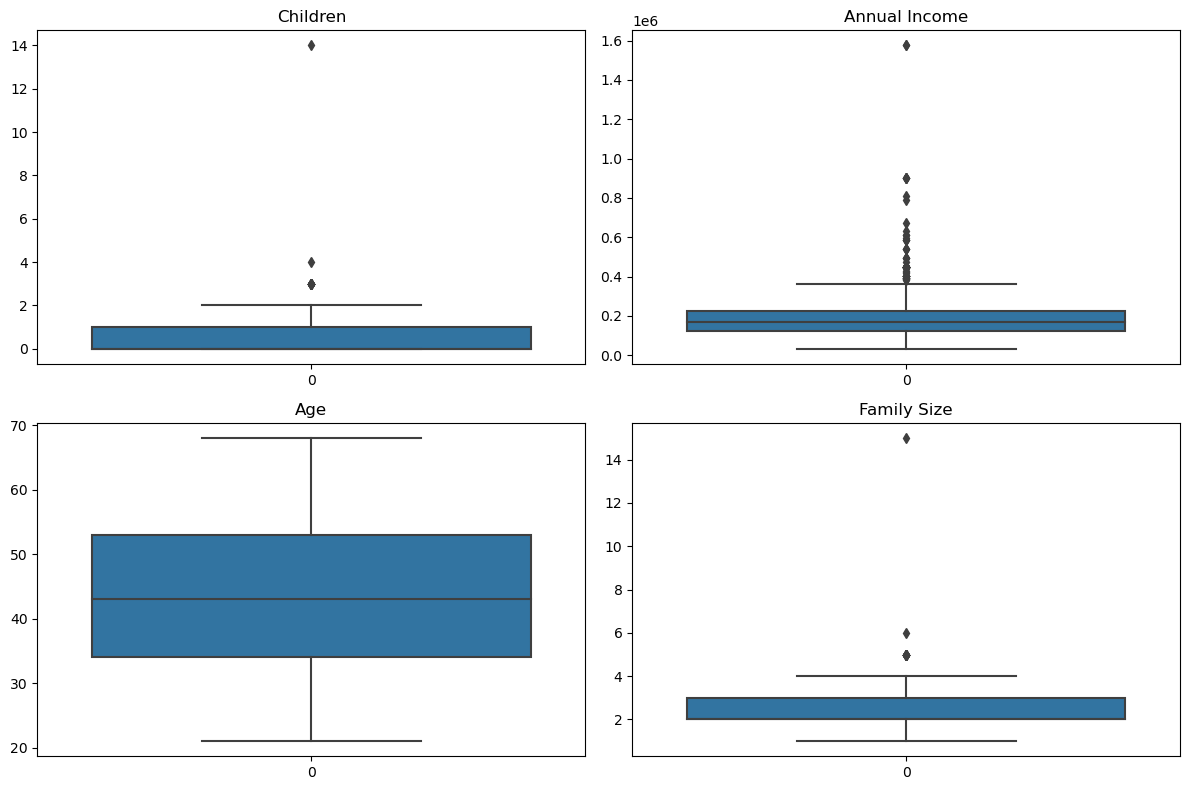

In [29]:
#Checking for all the outliers for continious variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

#Boxplot for 'children'
sns.boxplot(data=credit['children'], ax=axes[0, 0])
axes[0, 0].set_title('Children')

#Boxplot for 'annual_income'
sns.boxplot(data=credit['annual_income'], ax=axes[0, 1])
axes[0, 1].set_title('Annual Income')

#Boxplot for 'age'
sns.boxplot(data=credit['age'], ax=axes[1, 0])
axes[1, 0].set_title('Age')

#Boxplot for 'family_members'
sns.boxplot(data=credit['family_size'], ax=axes[1, 1])
axes[1, 1].set_title('Family Size')

plt.tight_layout()
plt.show()

From the information provided, it's evident that the "Children," "Family," and "Annual Income" columns contain outliers, whereas the "Age" column does not exhibit any outliers.

In [30]:
#Dealing with outlier for 'children'
Q1 = np.percentile(credit['children'], 25, interpolation='midpoint')
Q3 = np.percentile(credit['children'], 75, interpolation='midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
credit['children'] = credit['children'].clip(lower=0, upper=2)

#Dealing with outlier for 'family_members'
Q1 = np.percentile(credit['family_size'], 25, interpolation='midpoint')
Q3 = np.percentile(credit['family_size'], 75, interpolation='midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
credit['family_size'] = credit['family_size'].clip(lower=0, upper=4)

#Dealing with outlier for 'annual_income'
Q1 = np.percentile(credit['annual_income'], 25, interpolation='midpoint')
Q3 = np.percentile(credit['annual_income'], 75, interpolation='midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
credit['annual_income'] = np.where(
    (credit['annual_income'] < low_lim) | (credit['annual_income'] > up_lim),
    up_lim,
    credit['annual_income'])
credit['annual_income'] = credit['annual_income'].astype(int)

I have removed all outliers from the "Children," "Family Size," and "Annual Income" columns in your dataset. This action can help ensure that your data is more representative and suitable for analysis or modeling.

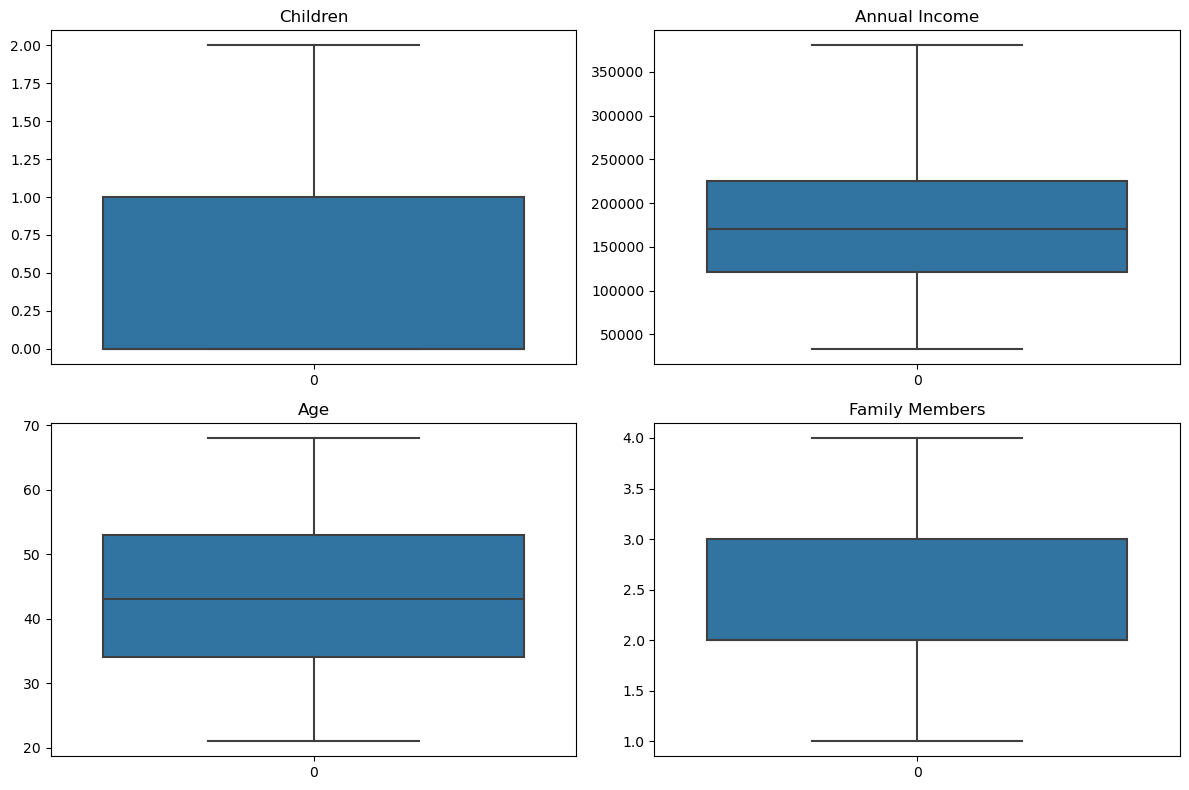

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

#Boxplot for 'children'
sns.boxplot(data=credit['children'], ax=axes[0, 0])
axes[0, 0].set_title('Children')

#Boxplot for 'annual_income'
sns.boxplot(data=credit['annual_income'], ax=axes[0, 1])
axes[0, 1].set_title('Annual Income')

#Boxplot for 'age'
sns.boxplot(data=credit['age'], ax=axes[1, 0])
axes[1, 0].set_title('Age')

#Boxplot for 'family_members'
sns.boxplot(data=credit['family_size'], ax=axes[1, 1])
axes[1, 1].set_title('Family Members')

plt.tight_layout()
plt.show()

In this context, it's evident that all outliers have been successfully eliminated.
Consequently, the dataset is now in a pristine condition, ready for analysis.

In [32]:
credit.describe(include = 'all').T

count unique                  top  freq            mean  \
id               1541.0    NaN                  NaN   NaN  5078979.253731   
gender             1541      2                    F   973             NaN   
car_owner          1541      2                    N   922             NaN   
propert_owner      1541      2                    Y  1007             NaN   
children         1541.0    NaN                  NaN   NaN          0.3939   
annual_income    1541.0    NaN                  NaN   NaN    183994.19403   
type_income        1541      4              Working   795             NaN   
education          1541      5  Secondary education  1029             NaN   
marital_status     1541      4              Married  1145             NaN   
housing_type       1541      6    House / apartment  1374             NaN   
age              1541.0    NaN                  NaN   NaN       43.960415   
employed_status    1541      2             Employed  1281             NaN   
family_size      1541.0    NaN                  NaN   NaN        2.144062   
approval_status  1541.0    NaN                  NaN   NaN        0.889682   

                          std        min        25%        50%        75%  \
id               41671.365842  5008827.0  5045113.0  5078924.0  5115671.0   
gender                    NaN        NaN        NaN        NaN        NaN   
car_owner                 NaN        NaN        NaN        NaN        NaN   
propert_owner             NaN        NaN        NaN        NaN        NaN   
children              0.66053        0.0        0.0        0.0        1.0   
annual_income    81875.423408    33750.0   121500.0   171000.0   225000.0   
type_income               NaN        NaN        NaN        NaN        NaN   
education                 NaN        NaN        NaN        NaN        NaN   
marital_status            NaN        NaN        NaN        NaN        NaN   
housing_type              NaN        NaN        NaN        NaN        NaN   
age                 11.517874       21.0       34.0       43.0       53.0   
employed_status           NaN        NaN        NaN        NaN        NaN   
family_size          0.861145        1.0        2.0        2.0        3.0   
approval_status      0.313387        0.0        1.0        1.0        1.0   

                       max  
id               5150412.0  
gender                 NaN  
car_owner              NaN  
propert_owner          NaN  
children               2.0  
annual_income     380250.0  
type_income            NaN  
education              NaN  
marital_status         NaN  
housing_type           NaN  
age                   68.0  
employed_status        NaN  
family_size            4.0  
approval_status        1.0

At this point, we can confidently grasp all the pertinent information with precision and clarity.

In [33]:
# Export to excel (csv) format
credit.to_csv('credit_card_cleaned.csv', index=False)

Exporting the cleaned dataset into csv format for further analysis on MySQL

### Data Insights

In [34]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1541 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1541 non-null   int64 
 1   gender           1541 non-null   object
 2   car_owner        1541 non-null   object
 3   propert_owner    1541 non-null   object
 4   children         1541 non-null   int64 
 5   annual_income    1541 non-null   int32 
 6   type_income      1541 non-null   object
 7   education        1541 non-null   object
 8   marital_status   1541 non-null   object
 9   housing_type     1541 non-null   object
 10  age              1541 non-null   int32 
 11  employed_status  1541 non-null   object
 12  family_size      1541 non-null   int64 
 13  approval_status  1541 non-null   int64 
dtypes: int32(2), int64(4), object(8)
memory usage: 200.8+ KB


In [35]:
df = credit['approval_status'].replace({1 : 'Approved', 0 : 'Not Approved'}).value_counts()
print("Approval Status Total Counts:")
print(df)

# Visualizing the total approved and not approved applicants

approval_labels = credit['approval_status'].value_counts().keys().tolist()
approval_values = credit['approval_status'].value_counts().values.tolist()
plot_data = [go.Pie(labels=approval_labels,
                    values=approval_values,
                    marker=dict(colors=['lightblue','orange'], line=dict(color="black",width=1.5)),
                    rotation=90,
                    hoverinfo="label+value+text",
                    hole= .5)]          

fig = go.Figure(data=plot_data) 
po.iplot(fig)

Approval Status Total Counts:
approval_status
Approved        1371
Not Approved     170
Name: count, dtype: int64


It is evident from the dataset that approximately 89% of the candidates who applied for the credit card were granted approval, while the remaining 11% did not receive approval.

-------------------------------
Age and approval Status:
          Not Approved  Approved  Total
age                                    
(20, 30]            22       203    225
(30, 40]            41       388    429
(40, 50]            45       361    406
(50, 60]            42       294    336
(60, 70]            20       125    145
All                170      1371   1541
-------------------------------



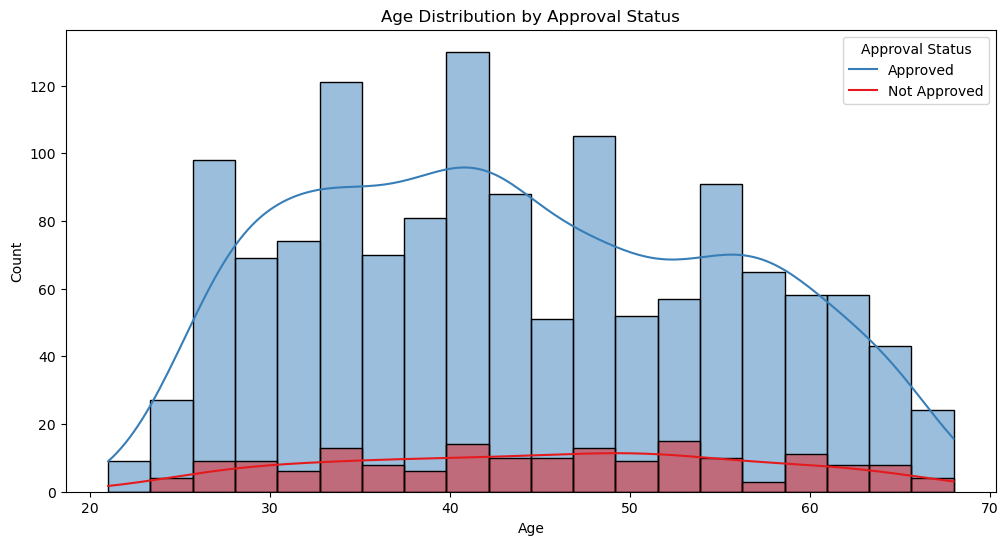

In [36]:
# Visualizing the age distribution

bin_age = credit['age']
bin_edge = [20, 30, 40, 50, 60, 70]
bin_age = pd.cut(credit['age'], bins = bin_edge)
age_approval = pd.crosstab(bin_age, credit['approval_status'], margins=True)
age_approval.columns = ['Not Approved', 'Approved', 'Total']
print("-------------------------------")
print("Age and approval Status:")
print(age_approval)
print("-------------------------------\n")

plt.figure(figsize=(12, 6))
sns.histplot(data=credit, x='age', bins=20, kde=True, hue='approval_status', palette='Set1')
plt.title('Age Distribution by Approval Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Approval Status', labels=['Approved', 'Not Approved'])
plt.show()

In our analysis, a significant number of credit card applicants fall within the age range of 30 to 60. The visual representations provide a comprehensive view of credit card approval patterns across various age groups.

In [37]:
# Permanently binning the age
bin_edges = [20, 30, 40, 50, 60, 70]
credit['age'] = pd.cut(credit['age'], bins=bin_edges)

-------------------------------
Employed status and approval Status:
approval_status    0     1   All
employed_status                 
Employed         136  1145  1281
Unemployed        34   226   260
All              170  1371  1541
-------------------------------



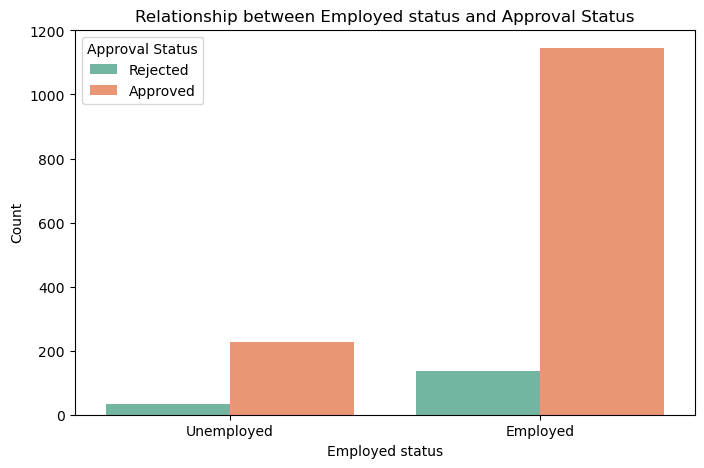

In [38]:
# Visualizing the employment status with respect to approval status

employed_approval = pd.crosstab(credit['employed_status'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Employed status and approval Status:")
print(employed_approval)
print("-------------------------------\n")
plt.figure(figsize=(8,5))
sns.countplot(data=credit, x='employed_status',  hue='approval_status', palette='Set2')
plt.title("Relationship between Employed status and Approval Status")
plt.xlabel("Employed status")
plt.ylabel("Count")
plt.legend(title='Approval Status', labels=['Rejected', 'Approved'])
plt.xticks(rotation=0)
plt.show()

The analysis strongly confirms that employed applicants have the highest credit card approval rate, in line with the initial hypothesis. Surprisingly, some unemployed applicants with other income sources like pensioners or self employed also received approvals.

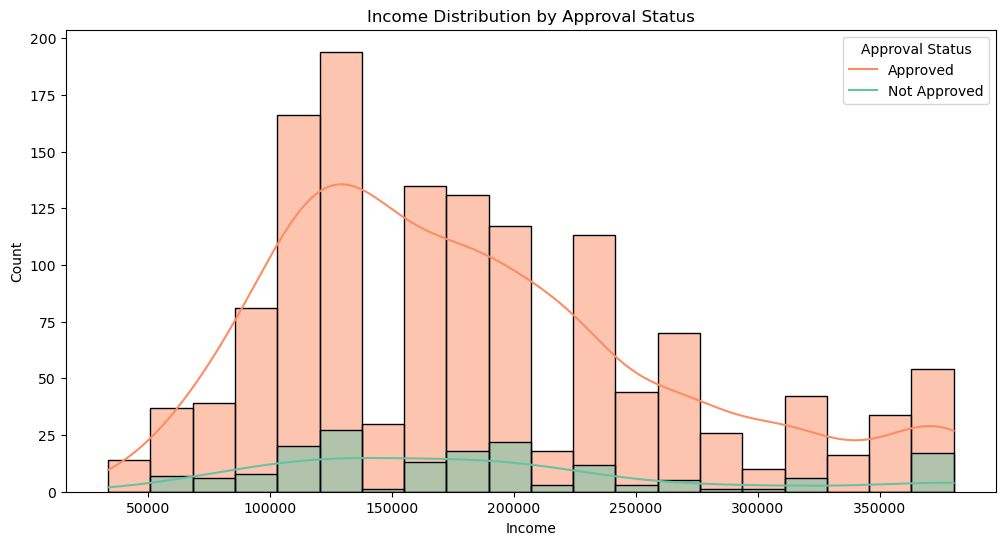

In [39]:
# Visualizing the income distribution

plt.figure(figsize=(12, 6))
sns.histplot(data=credit, x='annual_income', bins=20, kde=True, hue='approval_status', palette='Set2')
plt.title('Income Distribution by Approval Status')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend(title='Approval Status', labels=['Approved', 'Not Approved'])
plt.show()

The dataset analysis indicates that applicants earning over 1 Lakh are more likely to get credit card approvals, aligning with our hypothesis. However, the lack of currency information for earnings should be acknowledged.

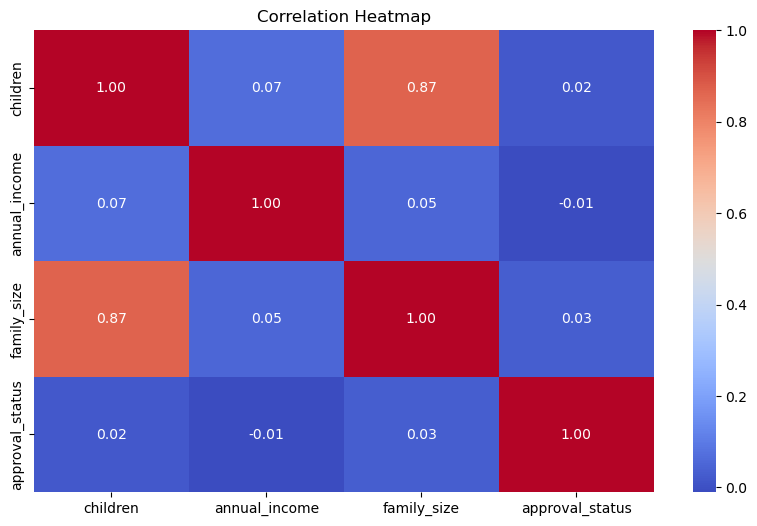

In [40]:
# Creating Heatmap to Visualize the relationship

correlation_columns = ['children', 'annual_income', 'family_size', 'approval_status']
correlation_df = credit[correlation_columns]
correlation_matrix = correlation_df.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

It's evident that there is a strong correlation between the number of children and family size.

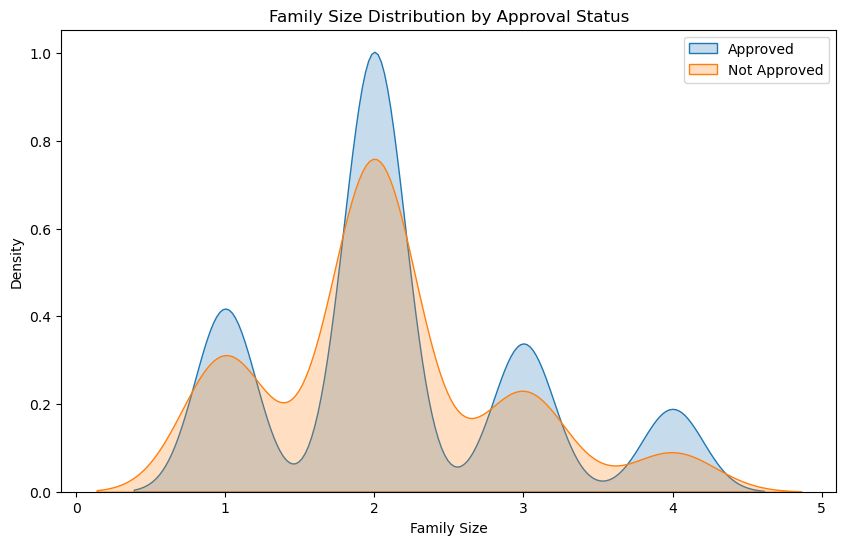

In [41]:
# Visualizing the Family size distribution by approval status 

approved_family_size = credit[credit['approval_status'] == 1]['family_size']
not_approved_family_size = credit[credit['approval_status'] == 0]['family_size']
plt.figure(figsize=(10, 6))
sns.kdeplot(approved_family_size, label='Approved', shade=True)
sns.kdeplot(not_approved_family_size, label='Not Approved', shade=True)
plt.title('Family Size Distribution by Approval Status')
plt.xlabel('Family Size')
plt.ylabel('Density')
plt.legend()
plt.show()

The data reveals a significant presence of approved credit card applicants with a family size of 2, often indicating married couples without children.This aligns with my hypothesis that family size can influence credit card approval; larger families may have distinct spending patterns due to higher expenses.

-------------------------------
Children and approval Status:
approval_status    0     1   All
children                        
0                122   964  1086
1                 35   268   303
2                 13   139   152
All              170  1371  1541
-------------------------------



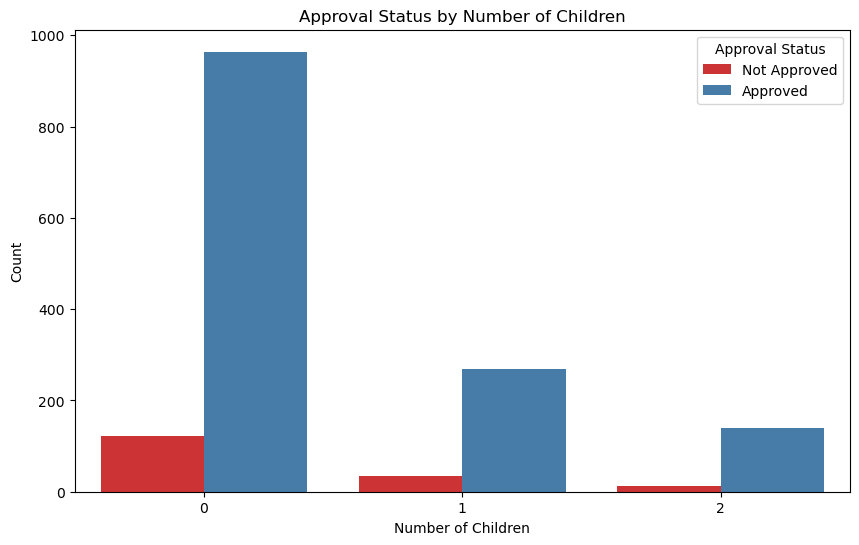

In [42]:
# Visualizing relationship between Children and Approval Status
children_approval = pd.crosstab(credit['children'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Children and approval Status:")
print(children_approval)
print("-------------------------------\n")
plt.figure(figsize=(10, 6))
sns.countplot(x='children', hue='approval_status', data=credit, palette='Set1')
plt.title('Approval Status by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.legend(title='Approval Status', labels=['Not Approved', 'Approved'])
plt.show()

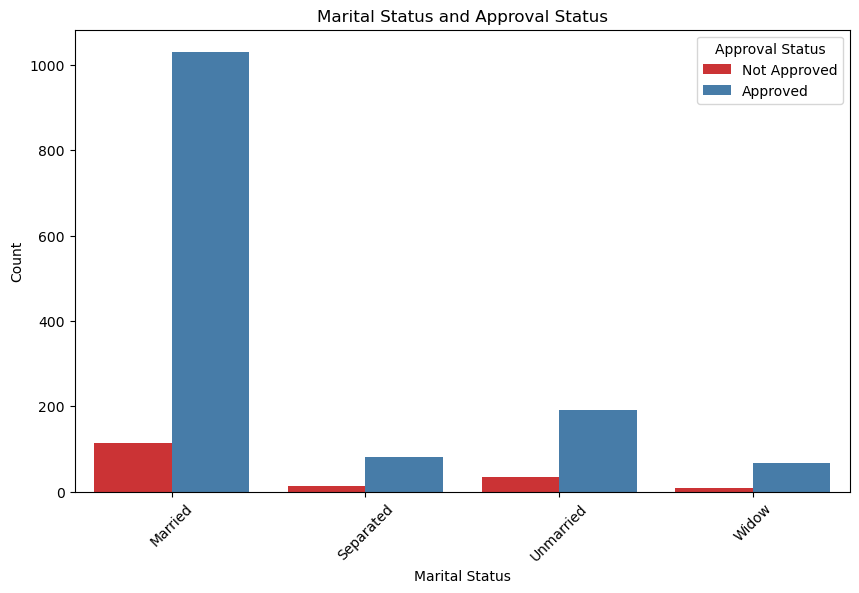

In [43]:
# Visualizing relationship between Marital Status and Approval Status

plt.figure(figsize=(10, 6))
sns.countplot(x='marital_status', hue='approval_status', data=credit, palette='Set1')
plt.title('Marital Status and Approval Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Approval Status', labels=['Not Approved', 'Approved'])
plt.xticks(rotation=45)
plt.show()

A family size of 2 members indicates a married couple without children. Furthermore, the data indicates that a larger proportion of married individuals have received credit card approvals. This observation aligns with your initial assumption.

-------------------------------
Car Owners and approval Status:
approval_status    0     1   All
car_owner                       
N                106   816   922
Y                 64   555   619
All              170  1371  1541
-------------------------------



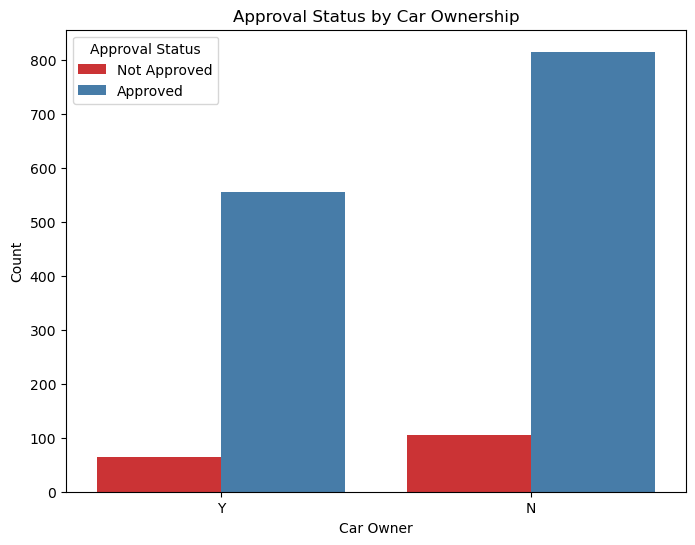

In [44]:
# Visualizing relationship between Car Owners and Approval Status

car_approval = pd.crosstab(credit['car_owner'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Car Owners and approval Status:")
print(car_approval)
print("-------------------------------\n")
plt.figure(figsize=(8, 6))
sns.countplot(x='car_owner', hue='approval_status', data=credit, palette='Set1')
plt.title('Approval Status by Car Ownership')
plt.xlabel('Car Owner')
plt.ylabel('Count')
plt.legend(title='Approval Status', labels=['Not Approved', 'Approved'])
plt.show()

The data indicates that car or vehicle ownership does not appear to significantly impact credit card approval, as the count of applicants without a car or vehicle greatly outweighs those who own one.

-------------------------------
Property Owner and approval Status:
approval_status    0     1   All
propert_owner                   
N                 62   472   534
Y                108   899  1007
All              170  1371  1541
-------------------------------



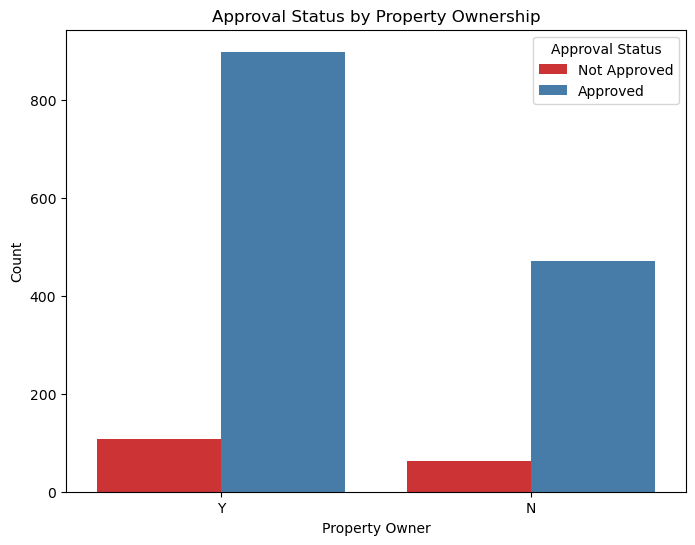

In [45]:
# Visualizing relationship between Property Owners and Approval Status

property_approval = pd.crosstab(credit['propert_owner'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Property Owner and approval Status:")
print(property_approval)
print("-------------------------------\n")
plt.figure(figsize=(8, 6))
sns.countplot(x='propert_owner', hue='approval_status', data=credit, palette='Set1')
plt.title('Approval Status by Property Ownership')
plt.xlabel('Property Owner')
plt.ylabel('Count')
plt.legend(title='Approval Status', labels=['Not Approved', 'Approved'])
plt.show()

In contrast, property ownership emerges as a more influential factor in credit card approval decisions. Applicants who own property are notably more likely to secure approval for a credit card. This suggests that property ownership plays a more substantial role in the credit card approval process compared to vehicle ownership.

-------------------------------
Income Type and approval Status:
approval_status         0     1   All
type_income                          
Commercial associate   50   314   364
Pensioner              40   227   267
State servant           5   110   115
Working                75   720   795
All                   170  1371  1541
-------------------------------



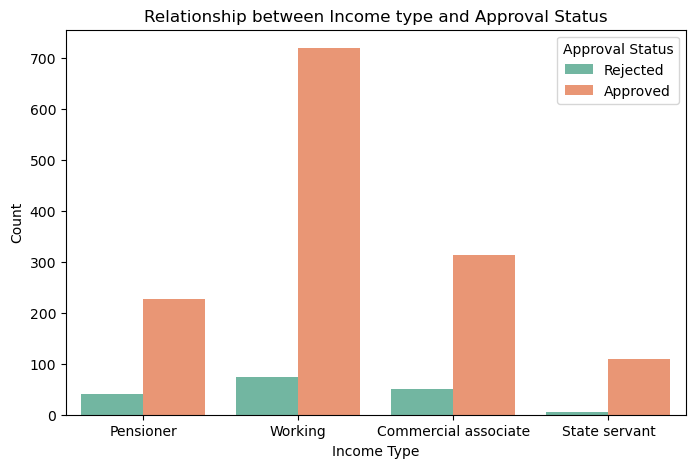

In [46]:
# Visualizing Relationship between Income Type and Approval Status
income_approval = pd.crosstab(credit['type_income'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Income Type and approval Status:")
print(income_approval)
print("-------------------------------\n")
plt.figure(figsize=(8,5))
sns.countplot(data=credit, x='type_income',  hue='approval_status', palette='Set2')
plt.title("Relationship between Income type and Approval Status")
plt.xlabel("Income Type")
plt.ylabel("Count")
plt.legend(title='Approval Status', labels=['Rejected', 'Approved'])
plt.xticks(rotation=0)
plt.show()

The data reveals a link between income type and employment status, with "working," "commercial associate," and "state servant" applicants typically classified as employed. In contrast, "pensioner" applicants are often categorized as unemployed, indicating a correlation between income type and employment status.

-------------------------------
Education and approval Status:
approval_status        0     1   All
education                           
Academic degree        0     2     2
Higher education      52   369   421
Incomplete higher      5    63    68
Lower secondary        6    15    21
Secondary education  107   922  1029
All                  170  1371  1541
-------------------------------



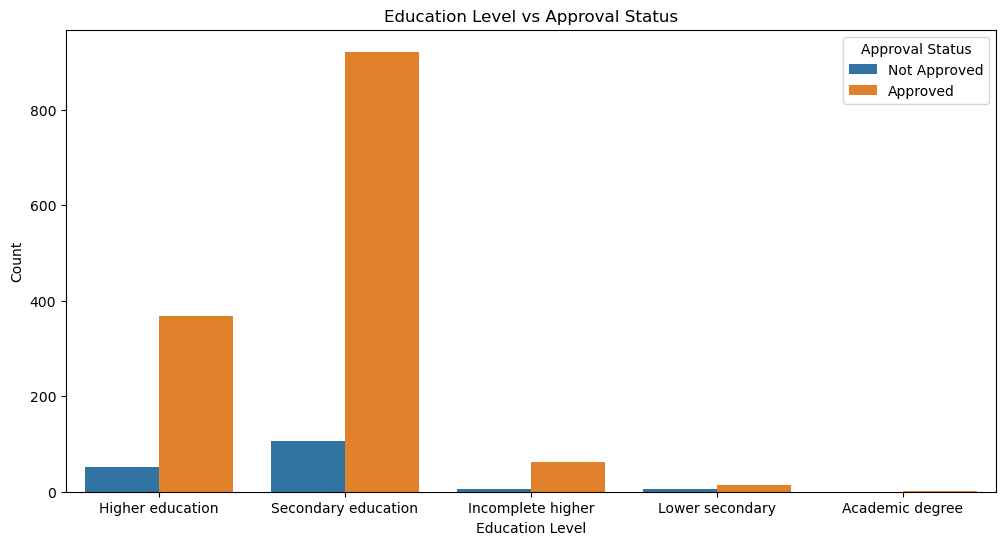

In [47]:
# Relationship between Education Level and Approval Status
education_approval = pd.crosstab(credit['education'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Education and approval Status:")
print(education_approval)
print("-------------------------------\n")
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='approval_status', data=credit)
plt.title('Education Level vs Approval Status')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Approval Status', labels=['Not Approved', 'Approved'])
plt.show()

The data suggests that the education qualification of applicants does not notably impact credit card approval, with most approvals going to those with secondary education. Applicants with a degree, surprisingly, have the lowest approval rates, indicating that education level may not be a significant factor in credit card approval decisions.

-------------------------------
Housing type and approval Status:
approval_status        0     1   All
housing_type                        
Co-op apartment        2     3     5
House / apartment    141  1233  1374
Municipal apartment   16    37    53
Office apartment       2     7     9
Rented apartment       4    17    21
With parents           5    74    79
All                  170  1371  1541
-------------------------------



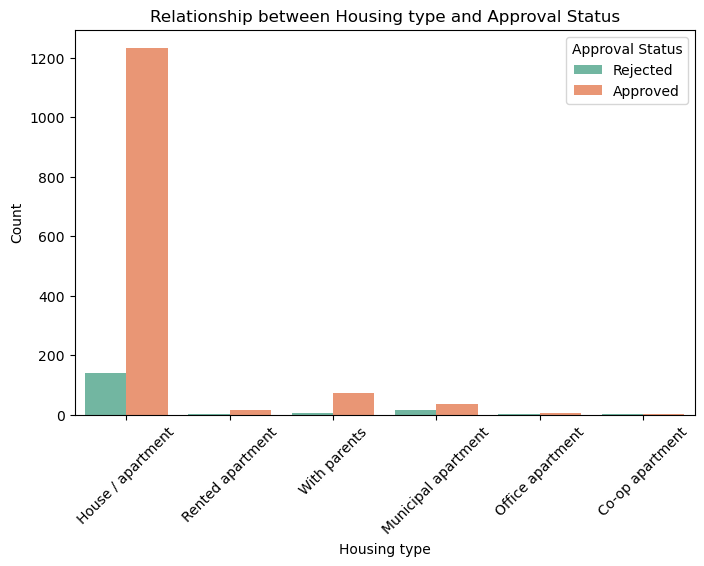

In [48]:
# Relationship between Housing Type and Approval Status
housing_approval = pd.crosstab(credit['housing_type'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Housing type and approval Status:")
print(housing_approval)
print("-------------------------------\n")
plt.figure(figsize=(8,5))
sns.countplot(data=credit, x='housing_type',  hue='approval_status', palette='Set2')
plt.title("Relationship between Housing type and Approval Status")
plt.xlabel("Housing type")
plt.ylabel("Count")
plt.legend(title='Approval Status', labels=['Rejected', 'Approved'])
plt.xticks(rotation=45)
plt.show()

As observed previously with property ownership, a significant number of applicants possess a house or apartment as a form of property. This reiterates the notion that individuals who own property are more likely to receive credit card approvals.

## Feature Encoding

In [49]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1541 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               1541 non-null   int64   
 1   gender           1541 non-null   object  
 2   car_owner        1541 non-null   object  
 3   propert_owner    1541 non-null   object  
 4   children         1541 non-null   int64   
 5   annual_income    1541 non-null   int32   
 6   type_income      1541 non-null   object  
 7   education        1541 non-null   object  
 8   marital_status   1541 non-null   object  
 9   housing_type     1541 non-null   object  
 10  age              1541 non-null   category
 11  employed_status  1541 non-null   object  
 12  family_size      1541 non-null   int64   
 13  approval_status  1541 non-null   int64   
dtypes: category(1), int32(1), int64(4), object(8)
memory usage: 196.6+ KB


### Encoding Independent Variables

In [50]:
X = credit.iloc[:, :-1]

In [51]:
X.drop(columns=['id','type_income'], inplace=True, axis=1) # These variables are not necessary

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1541 entries, 0 to 1547
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   gender           1541 non-null   object  
 1   car_owner        1541 non-null   object  
 2   propert_owner    1541 non-null   object  
 3   children         1541 non-null   int64   
 4   annual_income    1541 non-null   int32   
 5   education        1541 non-null   object  
 6   marital_status   1541 non-null   object  
 7   housing_type     1541 non-null   object  
 8   age              1541 non-null   category
 9   employed_status  1541 non-null   object  
 10  family_size      1541 non-null   int64   
dtypes: category(1), int32(1), int64(2), object(7)
memory usage: 160.5+ KB


In [53]:
categorical_columns = [0, 1, 2, 5, 6, 7, 8, 9] 
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')
X = ct.fit_transform(X)
X

array([[0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 1.800e+05,
        2.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 1.350e+05,
        4.000e+00],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 2.475e+05,
        1.000e+00],
       ...,
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 1.350e+05,
        1.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 1.161e+05,
        2.000e+00],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 6.750e+04,
        1.000e+00]])

### Encoding Dependent Variable

In [54]:
y = credit.iloc[:,-1]
y

0       0
1       1
2       1
3       1
4       1
       ..
1543    1
1544    1
1545    1
1546    1
1547    1
Name: approval_status, Length: 1541, dtype: int64

### Treating Imbalance in dataset

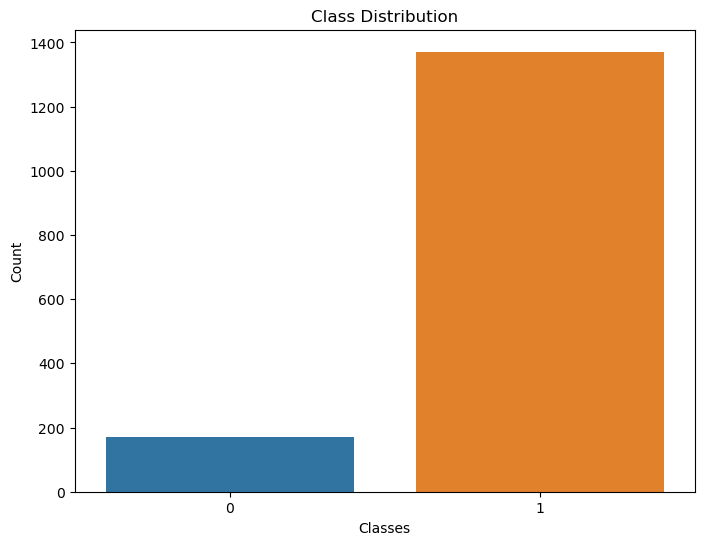

approval_status
1    1371
0     170
Name: count, dtype: int64


In [55]:
# Count the occurrences of each class
class_distribution = y.value_counts()
# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()
print(class_distribution)

As we have less data i would be going with over sampling

In [56]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X, y = oversampler.fit_resample(X, y)

### Splitting Train and Test data

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [58]:
print(X_train.shape)
print(X_test.shape)

(2193, 31)
(549, 31)


In [59]:
bf_stan_train = X_train.copy()
bf_stan_train

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 2.9250e+05,
        2.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.5750e+05,
        3.0000e+00],
       [1.0000e+00, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 1.8000e+05,
        1.0000e+00],
       ...,
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.3500e+05,
        2.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.5750e+05,
        3.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0000e+00, 3.8025e+05,
        3.0000e+00]])

In [60]:
bf_stan_test = X_test.copy()
bf_stan_test

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 9.000e+04,
        2.000e+00],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 2.000e+00, 1.800e+05,
        4.000e+00],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 2.000e+00, 1.800e+05,
        4.000e+00],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 9.450e+04,
        2.000e+00],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 1.125e+05,
        2.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 3.150e+05,
        2.000e+00]])

### Standardizing the X train and X test

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train[:,:] = sc.fit_transform(X_train[:,:])

X_test[:,:] = sc.transform(X_test[:,:])

In [62]:
X_train

array([[-1.19861031,  1.19861031, -1.24976633, ..., -0.58876311,
         1.2315636 , -0.12655203],
       [ 0.83429952, -0.83429952, -1.24976633, ...,  0.95199763,
        -0.35073006,  1.0594676 ],
       [ 0.83429952, -0.83429952,  0.80014957, ..., -0.58876311,
        -0.08701445, -1.31257165],
       ...,
       [-1.19861031,  1.19861031, -1.24976633, ..., -0.58876311,
        -0.61444567, -0.12655203],
       [-1.19861031,  1.19861031, -1.24976633, ...,  0.95199763,
        -0.35073006,  1.0594676 ],
       [ 0.83429952, -0.83429952, -1.24976633, ...,  2.49275837,
         2.26005448,  1.0594676 ]])

In [63]:
X_test

array([[ 0.83429952, -0.83429952, -1.24976633, ..., -0.58876311,
        -1.14187689, -0.12655203],
       [ 0.83429952, -0.83429952,  0.80014957, ...,  2.49275837,
        -0.08701445,  2.24548723],
       [ 0.83429952, -0.83429952,  0.80014957, ...,  2.49275837,
        -0.08701445,  2.24548723],
       ...,
       [ 0.83429952, -0.83429952, -1.24976633, ..., -0.58876311,
        -1.08913377, -0.12655203],
       [ 0.83429952, -0.83429952,  0.80014957, ..., -0.58876311,
        -0.87816128, -0.12655203],
       [ 0.83429952, -0.83429952, -1.24976633, ..., -0.58876311,
         1.49527921, -0.12655203]])

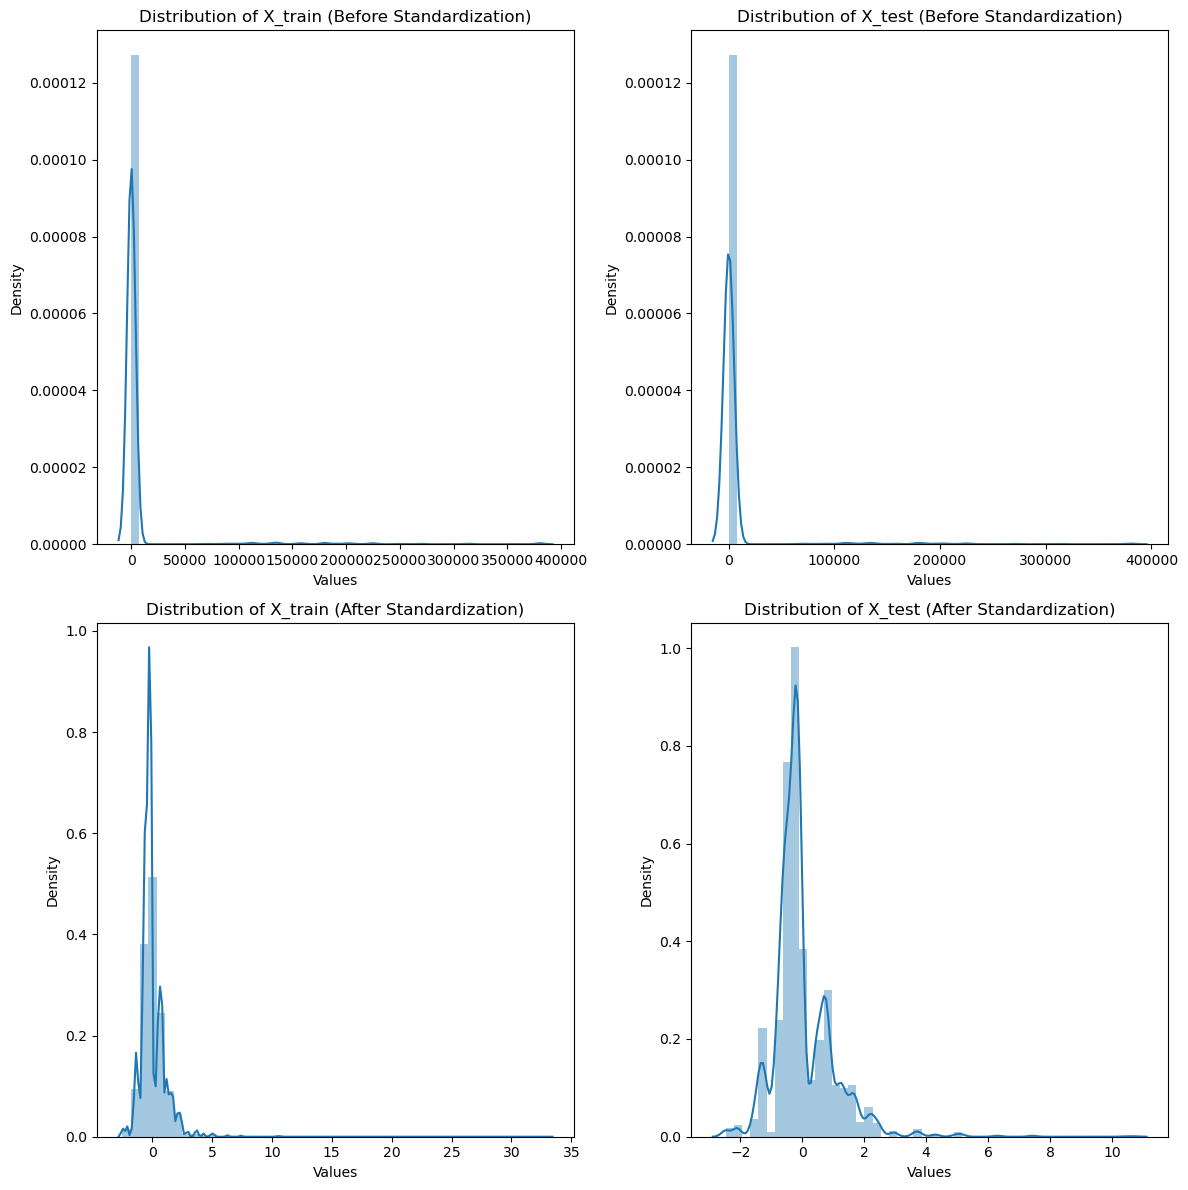

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two rows and two columns
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Before Standardization: Plot the distribution of X_train
sns.distplot(bf_stan_train, kde=True, ax=axes[0, 0])
axes[0, 0].set_xlabel('Values')
axes[0, 0].set_ylabel('Density')
axes[0, 0].set_title('Distribution of X_train (Before Standardization)')

# Before Standardization: Plot the distribution of X_test
sns.distplot(bf_stan_test, kde=True, ax=axes[0, 1])
axes[0, 1].set_xlabel('Values')
axes[0, 1].set_ylabel('Density')
axes[0, 1].set_title('Distribution of X_test (Before Standardization)')

# After Standardization: Plot the distribution of X_train
sns.distplot(X_train, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Values')
axes[1, 0].set_ylabel('Density')
axes[1, 0].set_title('Distribution of X_train (After Standardization)')

# After Standardization: Plot the distribution of X_test
sns.distplot(X_test, kde=True, ax=axes[1, 1])
axes[1, 1].set_xlabel('Values')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('Distribution of X_test (After Standardization)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


There is a significant contrast between the data before and after standardization.

# Building Machine learning Models

### Logistic Regression

In [65]:
lr_mod = LogisticRegression()

In [66]:
lr_mod.fit(X_train, y_train)
y_pred_lr_test = lr_mod.predict(X_test)

In [67]:
class_report_lr = classification_report(y_test, y_pred_lr_test)
print(class_report_lr)

              precision    recall  f1-score   support

           0       0.65      0.49      0.56       282
           1       0.57      0.72      0.64       267

    accuracy                           0.60       549
   macro avg       0.61      0.60      0.60       549
weighted avg       0.61      0.60      0.60       549



In [68]:
# Define the hyperparameter grid to search for logistic regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga']}

grid_search_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)  

grid_search_lr.fit(X_train, y_train)

# Get the best hyperparameters and the best score
best_params_lr = grid_search_lr.best_params_
best_model_lr = grid_search_lr.best_estimator_
print(best_params_lr)
print(best_model_lr)

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=10, solver='liblinear')


In [69]:
lr_mod_best = LogisticRegression(C=10, penalty='l2', solver='liblinear')
lr_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_lr = lr_mod_best.predict(X_test)
class_report_lr_best = classification_report(y_test, y_pred_best_lr)
print(class_report_lr_best)

              precision    recall  f1-score   support

           0       0.65      0.50      0.56       282
           1       0.57      0.72      0.64       267

    accuracy                           0.60       549
   macro avg       0.61      0.61      0.60       549
weighted avg       0.61      0.60      0.60       549



In [70]:
lrmodel_accuracy = round(accuracy_score(y_test, y_pred_best_lr)*100, 2)
print(lrmodel_accuracy)

60.47


Logistic Regression model we can predict 60.47% accurately. the best after hyperparameter tuning we are getting same accuracy

### DecisionTree

In [71]:
dt_mod = DecisionTreeClassifier()

In [72]:
dt_mod.fit(X_train, y_train)
y_pred_dt_test = dt_mod.predict(X_test)

In [73]:
class_report_dt = classification_report(y_pred_dt_test, y_test)
print(class_report_dt)

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       313
           1       0.88      0.99      0.93       236

    accuracy                           0.94       549
   macro avg       0.93      0.94      0.94       549
weighted avg       0.94      0.94      0.94       549



In [74]:
# Define the hyperparameter grid to search for decision tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']}

# Create the GridSearchCV object
grid_search_dt = GridSearchCV(dt_mod, param_grid_dt, cv=5, scoring='f1', n_jobs=-1)

grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_dt = grid_search_dt.best_params_
best_model_dt = grid_search_dt.best_estimator_
print(best_params_dt)
print(best_model_dt)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier()


In [75]:
dt_mod_best = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf = 1, min_samples_split = 2)
dt_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_dt = dt_mod_best.predict(X_test)
class_report_dt_best = classification_report(y_test, y_pred_best_dt)
print(class_report_dt_best)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       282
           1       0.99      0.87      0.93       267

    accuracy                           0.93       549
   macro avg       0.94      0.93      0.93       549
weighted avg       0.94      0.93      0.93       549



In [76]:
dtmodel_accuracy = round(accuracy_score(y_test, y_pred_best_dt)*100, 2)
print(dtmodel_accuracy)

93.44


Decision Tree model we can predict 94% accurately, after tuning we are getting 93.44% aacuracy less than previous 

### Random Forest

In [77]:
rf_mod = RandomForestClassifier(random_state = 42)

In [78]:
rf_mod.fit(X_train, y_train)
y_pred_rf_test = rf_mod.predict(X_test)

In [79]:
class_report_rf = classification_report(y_pred_rf_test, y_test)
print(class_report_rf)

              precision    recall  f1-score   support

           0       0.99      0.92      0.96       304
           1       0.91      0.99      0.95       245

    accuracy                           0.95       549
   macro avg       0.95      0.96      0.95       549
weighted avg       0.96      0.95      0.95       549



In [80]:
# Define the hyperparameter grid to search for random forest
param_grid_rf = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']}

grid_search_rf = GridSearchCV(rf_mod, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_
print(best_params_rf)
print(best_model_rf)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier(random_state=42)


In [81]:
rf_mod_best = RandomForestClassifier(criterion = 'gini', min_samples_leaf = 1, min_samples_split=2, n_estimators=100, random_state=42)
rf_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_rf = rf_mod_best.predict(X_test)
class_report_rf_best = classification_report(y_test, y_pred_best_rf)
print(class_report_rf_best)

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       282
           1       0.99      0.91      0.95       267

    accuracy                           0.95       549
   macro avg       0.96      0.95      0.95       549
weighted avg       0.96      0.95      0.95       549



In [82]:
rfmodel_accuracy = round(accuracy_score(y_test, y_pred_best_rf)*100, 2)
print(rfmodel_accuracy)

95.26


Random Forest model we can predict 95.26% accurately, after tuning we are getting better aacuracy

## Support Vector Machine (SVM)

In [83]:
svc_mod = SVC()

In [84]:
svc_mod.fit(X_train, y_train)
y_pred_svc_test = svc_mod.predict(X_test)

In [85]:
class_report_svc = classification_report(y_pred_svc_test, y_test)
print(class_report_svc)

              precision    recall  f1-score   support

           0       0.91      0.75      0.82       345
           1       0.67      0.88      0.76       204

    accuracy                           0.80       549
   macro avg       0.79      0.82      0.79       549
weighted avg       0.83      0.80      0.80       549



In [86]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]}

# Create the GridSearchCV object
grid_search_svc = GridSearchCV(svc_mod, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search_svc.fit(X_train, y_train)

best_params_svc = grid_search_svc.best_params_
best_model_svc= SVC(**best_params_svc)
print(best_model_svc)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
SVC(C=10, gamma=1)


In [87]:
svc_mod_best = SVC(C=10, gamma=1)
svc_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_svc = svc_mod_best.predict(X_test)
class_report_svc_best = classification_report(y_test, y_pred_best_svc)
print(class_report_svc_best)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       282
           1       0.98      0.89      0.93       267

    accuracy                           0.94       549
   macro avg       0.94      0.94      0.94       549
weighted avg       0.94      0.94      0.94       549



In [88]:
svcmodel_accuracy = round(accuracy_score(y_test, y_pred_best_svc)*100, 2)
print(svcmodel_accuracy)

93.81


Support Vector Machine (SVM) model can predict 80% accurately, after tuning we are getting 93.81% more aacuracy

### Comparing all the four models

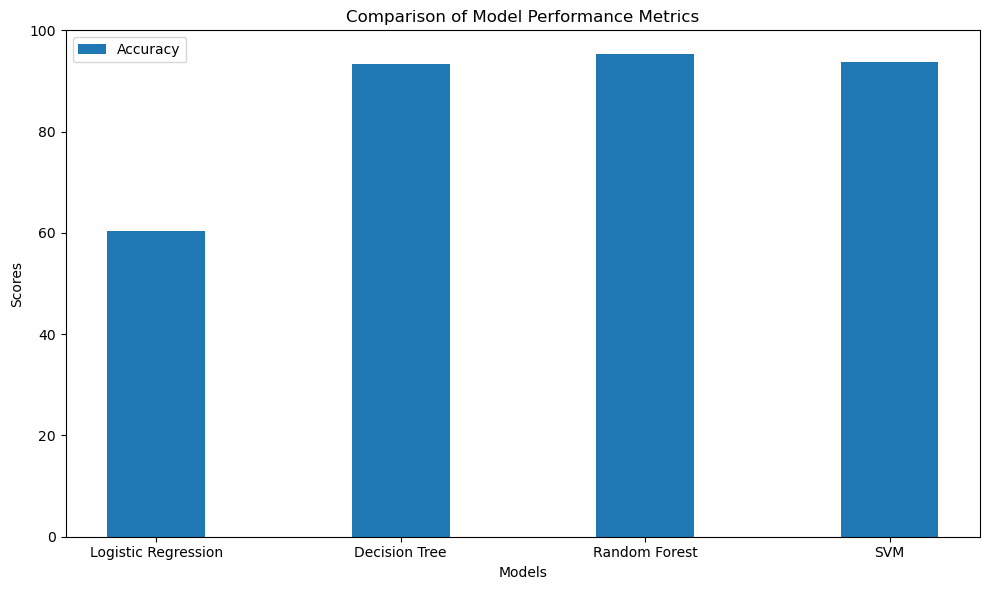

            Model_Name Accuracy Score
0        Random Forest         95.26%
1                  SVM         93.81%
2        Decision Tree         93.44%
3  Logistic Regression         60.47%


In [89]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
accuracy_scores = [lrmodel_accuracy, dtmodel_accuracy, rfmodel_accuracy, svcmodel_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, width=0.4, align='center', label='Accuracy')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Performance Metrics')
plt.legend()
plt.tight_layout()
plt.show()

# Create the model comparison DataFrame
accuracy_scores_with_percent = [f'{score}%' for score in accuracy_scores]
model_comparison_df = pd.DataFrame({'Model_Name': models, 'Accuracy Score': accuracy_scores_with_percent})
model_comparison_df = model_comparison_df.sort_values(by='Accuracy Score', ascending=False)
model_comparison_df.reset_index(drop=True, inplace=True)
print(model_comparison_df)

**Conclusion**

Based on the performance metrics of the four models (Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine) and considering the goal of maximizing the accuracy of credit card approval prediction, the **Random Forest Model** and emerges as the most suitable choice:

- **Accuracy Score:** The Random Forest model achieved the highest accuracy score among the models, with a value of 0.95. This indicates that it correctly predicted credit card approvals in 90% of cases.

- **Precision Score:** For predicting approved cases (1), the Random Forest model achieved a precision score of 0.99, signifying that when it predicted an approval, it was highly reliable. For predicting non-approved cases (0), it achieved a precision score of 0.92 , indicating a great level of accuracy.

- **Recall Score:** The Random Forest model demonstrated excellent recall for approved cases (1) with a score of 0.91, implying that it effectively captured nearly all actual credit card approvals. While its recall for non-approved cases (0) was lower at 0.99.

- **F1 Score:** The F1 Score, which combines precision and recall, was high for predicting approved cases (1), with a value of 0.95, indicating a good balance between precision and recall. For non-approved cases (0), the F1 Score was 0.96, reflecting a trade-off between precision and recall, as expected.

In conclusion, the Random Forest model demonstrates the best overall performance in terms of accuracy and precision while maintaining a reasonable balance between precision and recall for both approval and non-approval predictions. Therefore, it is the recommended choice for credit card approval prediction based on the provided data and evaluation metrics.